Importing Libraries

In [1]:
# importing all required libraries
from keras.datasets import cifar10
import pickle
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense , Dropout, Flatten
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Conv2D,MaxPooling2D
from matplotlib import pyplot
import timeit

Helper functions to implement MLP, CNN1, CNN2 Networks

In [2]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # split 20% of train data from the whole data
    X_train,X_test,y_train, y_test = train_test_split( trainX, trainY, test_size=0.8, random_state=42)
    print(X_train.shape)
    print(y_train.shape)
    print(testY.shape)
    # Spliting the test data into 50-50% for validation and test 
    X_test_train,X_val_test,y_test_train, y_val_test = train_test_split( testX, testY, test_size=0.5, random_state=42)
    print(X_test_train.shape)
    print(X_val_test.shape)
    print(y_test_train.shape)
    print(y_val_test.shape)
    return X_train, y_train, X_test_train,X_val_test,y_test_train, y_val_test
# scale pixels
def prep_pixels(train, test_test,test_val):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test_test.astype('float32') 
    test_norm_val = test_val.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    test_norm_val = test_norm_val/255.0
	  # return normalized images
    return train_norm , test_norm , test_norm_val
# defining model for MLP network 
def define_model_mlp(X_train,n):
	 # define model for 2 layers 
    model_mlp = Sequential()
    model_mlp.add(Flatten())
    model_mlp.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal',input_shape= X_train.shape[1:]))
    model_mlp.add(Dense(10, activation='softmax'))
    # compile the model
    model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #define model for 3 layers
    model_mlp3 = Sequential()
    model_mlp3.add(Flatten())
    model_mlp3.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal',input_shape= X_train.shape[1:]))
    model_mlp3.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp3.add(Dense(10, activation='softmax'))
    # compile the model
    model_mlp3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model for 4 layers
    model_mlp4 = Sequential()
    model_mlp4.add(Flatten())
    model_mlp4.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal',input_shape= X_train.shape[1:]))
    model_mlp4.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp4.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp4.add(Dense(10, activation='softmax'))
    # compile the model
    model_mlp4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model for 5 layers
    model_mlp5 = Sequential()
    model_mlp5.add(Flatten())
    model_mlp5.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal',input_shape= X_train.shape[1:]))
    model_mlp5.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp5.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp5.add(Dense(n, activation='sigmoid', kernel_initializer='he_normal'))
    model_mlp5.add(Dense(10, activation='softmax'))
    # compile the model
    model_mlp5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model_mlp,model_mlp3,model_mlp4,model_mlp5

def define_model_cnn(X_train):
    # CNN model for Frist CNN network
    model_cnn = Sequential()
    model_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
    model_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(512,activation='sigmoid'))
    model_cnn.add(Dense(512,activation='sigmoid'))
    model_cnn.add(Dense(10, activation='softmax'))
    model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # CNN model for Second CNN network 
    model_cnn1 = Sequential()
    model_cnn1.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
    model_cnn1.add(MaxPooling2D(pool_size=2))
    model_cnn1.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model_cnn1.add(MaxPooling2D(pool_size=2))
    model_cnn1.add(Flatten())
    model_cnn1.add(Dense(512,activation='sigmoid'))
    model_cnn1.add(Dropout(0.2))
    model_cnn1.add(Dense(512,activation='sigmoid'))
    model_cnn1.add(Dropout(0.2))
    model_cnn1.add(Dense(10, activation='softmax'))
    model_cnn1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
       
    return model_cnn,model_cnn1



Function Definations to train and test the Network models

In [3]:
# defining MLP Model for Train and Test, this is for 4 types of layers= 2,3,4,5 and 5 types of neurons = [64,128,256,512,1024] passing into the network 
def run_mlp():
    
    nofneurons = [64,128,256,512,1024] 
    # load dataset
    trainX, trainY,  testX_test,testX_val, testY_test, testY_val = load_dataset()
    # prepare normalize data
    trainX, testX_test,testX_val = prep_pixels(trainX, testX_test,testX_val)
    # define model
    for i in range(len(nofneurons)):
      accuracy = []
      accur_avg =[]
      score = []
      val_accury =[]
      model_mlp, model_mlp3,model_mlp4,model_mlp5 = define_model_mlp(trainX,nofneurons[i])
      model = [model_mlp, model_mlp3,model_mlp4,model_mlp5]
      # fit model
      for j in range(len(model)):
        history_mlp = model[j].fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX_val, testY_val), verbose=1)
        accuracy = history_mlp.history['accuracy']
        val_accur = history_mlp.history['val_accuracy']
        model[j].summary()
        accur= np.mean(accuracy)
        val_accur = np.mean(val_accur)
        accur_avg.append(accur)
        val_accury.append(val_accur)
        #score.append(score)
      print("Average Accuracy for one no of neuron : ",accur_avg)
      print("Average Val Accuracy for one no of neuron :", val_accury)
      pyplot.title('Accuracy')
      pyplot.plot(accur_avg, label='train')
      pyplot.plot(val_accury, label='test')
      pyplot.legend()
      pyplot.show()
      
    return accur_avg ,val_accury,score
# define model for 2 layers and only one neuron is passed as asked in the question, also calculating Train and test accuracy for the MLP 
def mlp_score():
    trainX, trainY, testX_test,testX_val, testY_test, testY_val = load_dataset()
    # prepare pixel data
    trainX, testX_test,testX_val = prep_pixels(trainX, testX_test,testX_val)
    model_mlp, model_mlp3,model_mlp4,model_mlp5 = define_model_mlp(trainX,512)
    #fitting the model on train data and validating on 50% of test data
    history_mlp = model_mlp.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX_val, testY_val), verbose=1)
    model_mlp.summary()
    # calculating test accuracy on 50% of test data
    score = model_mlp.evaluate(testX_test,testY_test, verbose=1)
    print('\n', 'Test accuracy of MLP:', score[1])
    yhat = model_mlp.predict(testX_test)
    print('Predicted of MLP: %s (class=%d)' % (yhat, np.argmax(yhat)))
    return score
# defining function to run train and test data on the first type of CNN model to calculate train and test accuracies
def run_cnn():
  # load dataset

    trainX_c, trainY_c, testX_test_c,testX_val_c, testY_test_c,textY_val_c = load_dataset()
    print(trainX_c.shape)
    print(trainY_c.shape)
    # prepare pixel data
    trainX_c, testX_test_c,testX_val_c = prep_pixels(trainX_c, testX_test_c,testX_val_c)
    # define model
    model_cnn,model_cnn1 = define_model_cnn(trainX_c)
    start_CNN1 = timeit.default_timer()
     #fitting the model on train data and validating on 50% of test data
    history_cnn = model_cnn.fit(trainX_c, trainY_c, epochs=5, batch_size=32, validation_data=(testX_val_c, textY_val_c), verbose=1)
    stop_CNN1 = timeit.default_timer()
    model_cnn.summary()
    accuracy_cnn = history_cnn.history['accuracy']
    Time_CNN1 = stop_CNN1-start_CNN1
    print("Time Taken for CNN1",Time_CNN1)
    # calculating test accuracy on 50% of test data
    score_cnn = model_cnn.evaluate(testX_test_c,testY_test_c, verbose=1)
    print('\n', 'Test accuracy of CNN:', score_cnn[1])
    yhat_c = model_cnn.predict(testX_test_c)
    print('Predicted of CNN: %s (class=%d)' % (yhat_c, np.argmax(yhat_c)))
    pyplot.title('Accuracy')
    pyplot.plot(accuracy_cnn, label='train')
    pyplot.plot(score_cnn, label='test')
    pyplot.legend()
    pyplot.show()

# defining function to run train and test data on the  second type of CNN model to calculate train and test accuracies
def run_cnn1():
  # load dataset
    trainX_c1, trainY_c1, testX_test_c1,testX_val_c1, testY_test_c1,textY_val_c1 = load_dataset()
    print(trainX_c1.shape)
    print(trainY_c1.shape)
    # prepare pixel data
    trainX_c1, testX_test_c1,testX_val_c1 = prep_pixels(trainX_c1, testX_test_c1,testX_val_c1)
    # define model
    model_cnn,model_cnn1 = define_model_cnn(trainX_c1)
     # #fitting the model on train data and validating on 50% of test data
    start_CNN2 = timeit.default_timer()
    history_cnn1 = model_cnn1.fit(trainX_c1, trainY_c1, epochs=5, batch_size=8, validation_data=(testX_val_c1, textY_val_c1), verbose=1)
    stop_CNN2 = timeit.default_timer()
    model_cnn1.summary()
    accuracy_cnn1 = history_cnn1.history['accuracy']
    Time_CNN2 = stop_CNN2 - start_CNN2
    print("Time for CNN2",Time_CNN2)
    # calculating test accuracy on 50% of test data
    score_cnn1 = model_cnn1.evaluate(testX_test_c1,testY_test_c1, verbose=1)
    print('\n', 'Test accuracy of CNN 1:', score_cnn1[1])
    yhat_c1 = model_cnn1.predict(testX_test_c1)
    print('Predicted of CNN 1: %s (class=%d)' % (yhat_c1, np.argmax(yhat_c1)))
    pyplot.title('Accuracy')
    pyplot.plot(accuracy_cnn1, label='train')
    pyplot.plot(score_cnn1, label='test')
    pyplot.legend()
    pyplot.show()



Run MLP Function Call

170500096/170498071 [==============================] - 2s 0us/step
(10000, 32, 32, 3)
(10000, 1)
(10000, 1)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 1)
(5000, 1)
Epoch 1/5
313/313 [==============================] - 4s 4ms/step - loss: 2.1946 - accuracy: 0.1958 - val_loss: 1.9394 - val_accuracy: 0.3240
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 1.9514 - accuracy: 0.3076 - val_loss: 1.8879 - val_accuracy: 0.3350
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 1.8705 - accuracy: 0.3447 - val_loss: 1.8699 - val_accuracy: 0.3330
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 1.8083 - accuracy: 0.3571 - val_loss: 1.8107 - val_accuracy: 0.3564
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.7932 - accuracy: 0.3724 - val_loss: 1.7993 - val_accuracy: 0.3574
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape    

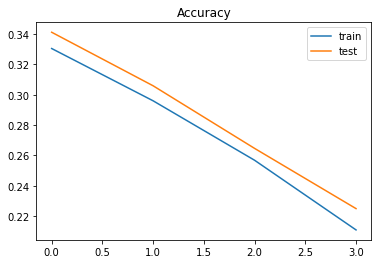

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.1516 - accuracy: 0.2133 - val_loss: 1.9650 - val_accuracy: 0.3008
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 1.9064 - accuracy: 0.3157 - val_loss: 1.8870 - val_accuracy: 0.3216
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 1.8314 - accuracy: 0.3458 - val_loss: 1.8417 - val_accuracy: 0.3370
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 1.8022 - accuracy: 0.3541 - val_loss: 1.7823 - val_accuracy: 0.3630
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.7666 - accuracy: 0.3740 - val_loss: 1.8024 - val_accuracy: 0.3508
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_14 

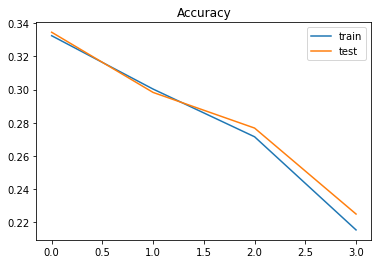

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.1823 - accuracy: 0.2108 - val_loss: 1.9258 - val_accuracy: 0.2938
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 1.8954 - accuracy: 0.3244 - val_loss: 1.8605 - val_accuracy: 0.3384
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 1.8210 - accuracy: 0.3581 - val_loss: 1.8205 - val_accuracy: 0.3544
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 1.7761 - accuracy: 0.3842 - val_loss: 1.8010 - val_accuracy: 0.3612
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.7754 - accuracy: 0.3706 - val_loss: 1.7724 - val_accuracy: 0.3684
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_28 

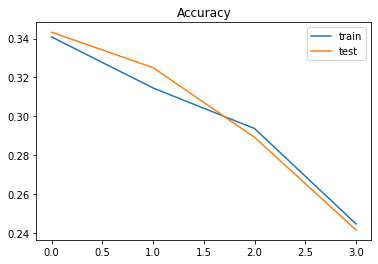

Epoch 1/5
313/313 [==============================] - 1s 4ms/step - loss: 2.2433 - accuracy: 0.2067 - val_loss: 1.9101 - val_accuracy: 0.2982
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 1.8825 - accuracy: 0.3117 - val_loss: 1.8561 - val_accuracy: 0.3456
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 1.8145 - accuracy: 0.3578 - val_loss: 1.8406 - val_accuracy: 0.3224
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 1.7577 - accuracy: 0.3704 - val_loss: 1.8030 - val_accuracy: 0.3420
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.7413 - accuracy: 0.3818 - val_loss: 1.7587 - val_accuracy: 0.3754
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_42

In [ ]:
run_mlp()

In [ ]:
mlp_score()

In [ ]:
run_cnn()

In [ ]:
run_cnn1()